In [614]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [615]:
# base params
kon = 1e5
koff = 1e-4
Target_cell_number = 5e3
qon = 6.5e3
qoff = 4.7e-3
k1off = koff
k2off = 2*koff
k3off = qoff
k4off = qoff
k5off = qoff
k6off = koff
k7off = 2*koff
gamma2 = k2off/k1off
gamma3 = k3off/k1off
gamma4 = k4off/k1off
gamma5 = k5off/k1off
gamma6 = k6off/k1off
gamma7 = k7off/k1off

a2 = 1
a4 = 1
a5 = 1
a6 = 1
a7 = 1

tend = 1
t = np.geomspace(1e-10, tend, 10000)
t_span = [1e-10, tend]

tend1 = 1
# = np.linspace(1e-10, -tend, 1000)
t1 = np.flip(t)
t_span1 = [tend1, 1e-10]

tend2 = 10
t2 = np.geomspace(1e-10, tend2, 10000)
t_span2 = [1e-10, tend2]

In [616]:
def single_cell_model(t, z, delta, A_0, rtot):
    
    Ainit = A_0
    k = Ainit*kon
    k1 = 2*k
    alpha1 = k1/k1off
    Atot = 1e16*Ainit/Target_cell_number
    beta = Atot/rtot

    dA1 = alpha1*(1-z[0]-2*z[1])*(beta-z[0]-z[1]) - z[0] - delta*alpha1*(1-z[0]-2*z[1])*z[0] + 2*(a2)*z[1]
    dA2 = delta*alpha1*(1-z[0]-2*z[1])*z[0] - 2*(a2)*z[1]

    return [dA1, dA2]

def single_cell_stst(delta, A_0, rtot):

    z0 = [0, 0]

    # solve single cell model to obtain equilibrium values
    # to use as ics for A10 and A20 in two cell model
    z = solve_ivp(single_cell_model, t_span, z0, method='Radau', args=(delta, A_0, rtot), t_eval=t)
    A1 = z.y[0]
    A2 = z.y[1]
    A1_stst = A1[-1]
    A2_stst = A2[-1]
    
    return [A1_stst, A2_stst]

def two_cells(t, z, phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, A11_0, A21_0):

    Ainit = A_0
    k = Ainit*kon
    q = qon*Ainit
    delta5 = delta4*delta7/delta2
    delta6 = delta4
    k1 = 2*k
    k2 = delta2*k
    k3 = q
    k4 = delta4*q
    k5 = delta5*q
    k6 = 2*delta6*k
    k7 = delta7*k

    alpha1 = k1/k1off
    alpha2 = k2/k1off
    alpha3 = k3/k1off
    alpha4 = k4/k1off
    alpha5 = k5/k1off
    alpha6 = k6/k1off
    alpha7 = k7/k1off

    beta_synapse = 1e1*Ainit
    beta_t = beta_synapse + A10_0 + A20_0 + (A01_0/phi) + A11_0 + A21_0
    beta_f = phi*beta_t

    A00 = (1 - (1/beta_t)*(z[0] + z[1] + z[3] + z[4] + (1/phi)*z[2]))
    rt = 1- z[0] - z[3] - 2*(z[1] + z[4])
    rf = 1 - z[2] - phi*(z[3] + z[4])
    
    dA10 = alpha1*beta_t*(A00)*(rt) - z[0] - alpha2*z[0]*(rt) + gamma2*z[1] - alpha4*z[0]*(rf) + gamma4*z[3]
    dA20 = alpha2*z[0]*(rt) - gamma2*z[1] - alpha5*z[1]*(rf) + gamma5*z[4]
    dA01 = alpha3*beta_f*(A00)*(rf) - gamma3*z[2] - alpha6*z[2]*(rt) + gamma6*phi*z[3]
    dA11 = alpha4*z[0]*(rf) - gamma4*z[3] + (alpha6/phi)*z[2]*(rt) - gamma6*z[3] - alpha7*z[3]*(rt) + gamma7*z[4]
    dA21 = alpha5*z[1]*(rf) - gamma5*z[4] + alpha7*z[3]*(rt) - gamma7*z[4]
    dz = [dA10, dA20, dA01, dA11, dA21]

    return dz


def two_cells1(t, z, phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, A11_0, A21_0):

    Ainit = A_0
    k = Ainit*kon
    q = qon*Ainit
    delta5 = delta4*delta7/delta2
    delta6 = delta4
    k1 = 2*k
    k2 = delta2*k
    k3 = q
    k4 = delta4*q
    k5 = delta5*q
    k6 = 2*delta6*k
    k7 = delta7*k

    alpha1 = k1/k1off
    alpha2 = k2/k1off
    alpha3 = k3/k1off
    alpha4 = k4/k1off
    alpha5 = k5/k1off
    alpha6 = k6/k1off
    alpha7 = k7/k1off

    beta_synapse = 1e1*Ainit
    beta_t = beta_synapse + A10_0 + A20_0 + (A01_0/phi) + A11_0 + A21_0
    beta_f = phi*beta_t

    A00 = (1 - (1/beta_t)*(z[0] + z[1] + z[3] + z[4] + (1/phi)*z[2]))
    rt = 1- z[0] - z[3] - 2*(z[1] + z[4])
    rf = 1 - z[2] - phi*(z[3] + z[4])
    
    dA10 = alpha1*beta_t*(A00)*(rt) - z[0] - alpha2*z[0]*(rt) + gamma2*z[1] - alpha4*z[0]*(rf) + gamma4*z[3]
    dA20 = alpha2*z[0]*(rt) - gamma2*z[1] - alpha5*z[1]*(rf) + gamma5*z[4]
    dA01 = alpha3*beta_f*(A00)*(rf) - gamma3*z[2] - alpha6*z[2]*(rt) + gamma6*phi*z[3]
    dA11 = alpha4*z[0]*(rf) - gamma4*z[3] + (alpha6/phi)*z[2]*(rt) - gamma6*z[3] - alpha7*z[3]*(rt) + gamma7*z[4]
    dA21 = alpha5*z[1]*(rf) - gamma5*z[4] + alpha7*z[3]*(rt) - gamma7*z[4]
    dz = [-dA10, -dA20, -dA01, -dA11, -dA21]

    return dz

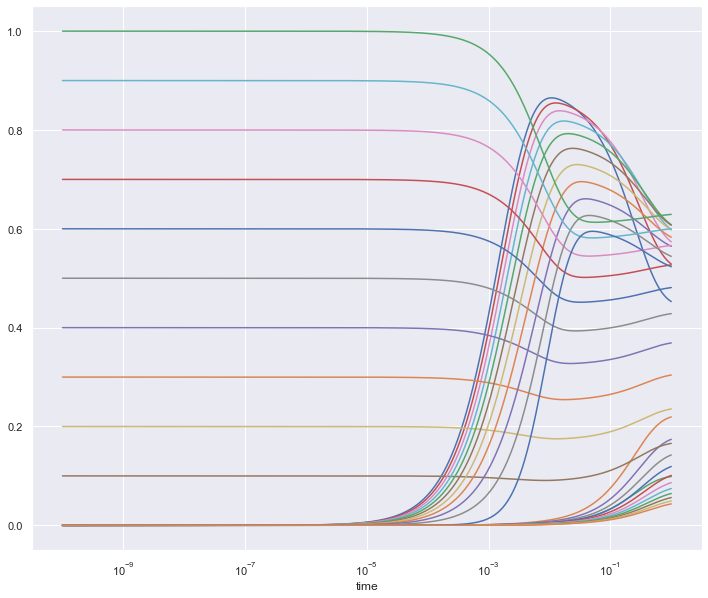

In [617]:
A_0 = 1e-5 
delta2 = 1
delta4 = 1
delta7 = 1
rtot_t = 1e5
rtot_f = 2.2e5
phi = rtot_t/rtot_f
A01_0_vals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

sns.set_theme()
fig, ax = plt.subplots(figsize=(12,10))

for A01_0 in A01_0_vals:
    ICS = single_cell_stst(delta2, A_0, rtot_t)
    A10_0 = ICS[0]
    A20_0 = ICS[1]
    beta_synapse = 1e1*A_0
    beta_t = beta_synapse + A10_0 + A20_0 + (A01_0/phi)
    beta_f = phi*beta_t
    z0 = [A10_0, A20_0, A01_0, 0, 0]
    z = solve_ivp(two_cells, t_span, z0, method='Radau', t_eval=t, args=(phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, 0, 0))

    A11 = z.y[3]
    A21 = z.y[4]

    plt.plot(t, z.y[3], label = str(A01_0))
    plt.plot(t, z.y[4], label = str(A01_0))
    plt.plot(t, z.y[2], label = str(A01_0))
    #plt.plot(t, A11 + A21, label = str(A01_0))


plt.xlabel('time')
plt.xscale('log')
#plt.legend(loc='best')
plt.show()

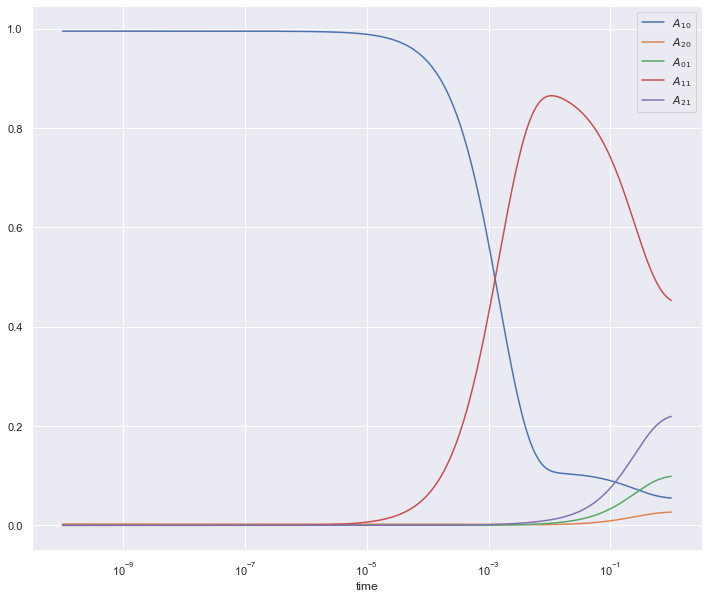

In [618]:
A_0 = 1e-5 
delta2 = 1
delta4 = 1
delta7 = 1
rtot_t = 1e5
rtot_f = 2.2e5
phi = rtot_t/rtot_f
A01_0 = 0

sns.set_theme()
fig, ax = plt.subplots(figsize=(12,10))


ICS = single_cell_stst(delta2, A_0, rtot_t)
A10_0 = ICS[0]
A20_0 = ICS[1]

z0 = [A10_0, A20_0, A01_0, 0, 0]
z = solve_ivp(two_cells, t_span, z0, method='Radau', t_eval=t, args=(phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, 0, 0))

A10 = z.y[0]
A20 = z.y[1]
A01 = z.y[2]
A11 = z.y[3]
A21 = z.y[4]

ICS_1 = [A10[-1], A20[-1], A01[-1], A11[-1], A21[-1]]

plt.plot(t, A10, label = r'$A_{10}$')
plt.plot(t, A20, label = r'$A_{20}$')
plt.plot(t, A01, label = r'$A_{01}$')
plt.plot(t, A11, label = r'$A_{11}$')
plt.plot(t, A21, label = r'$A_{21}$')
plt.xlabel('time')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

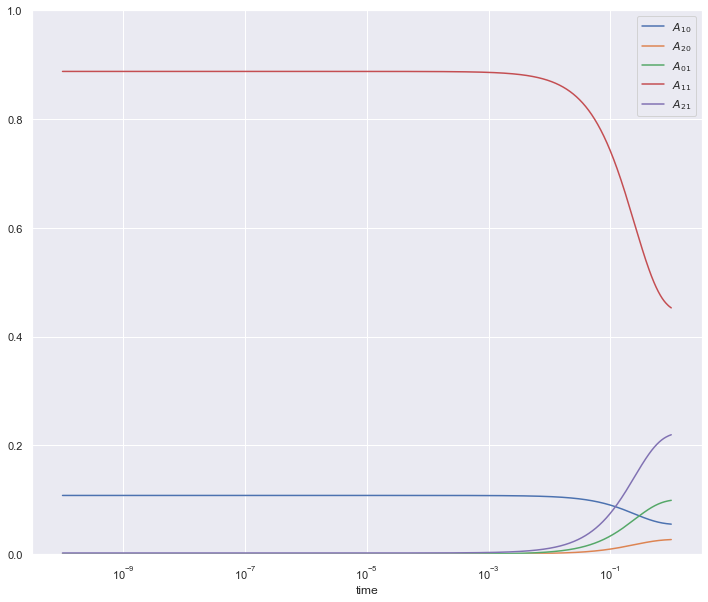

In [619]:
z1 = solve_ivp(two_cells, t_span1, ICS_1, method='Radau',t_eval=t1, args=(phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, 0, 0))

A10 = z1.y[0]
A20 = z1.y[1]
A01 = z1.y[2]
A11 = z1.y[3]
A21 = z1.y[4]
ICS2 = z1.y[:,-1]
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(t1, A10, label = r'$A_{10}$')
plt.plot(t1, A20, label = r'$A_{20}$')
plt.plot(t1, A01, label = r'$A_{01}$')
plt.plot(t1, A11, label = r'$A_{11}$')
plt.plot(t1, A21, label = r'$A_{21}$')
plt.ylim(0, 1)
plt.xlabel('time')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

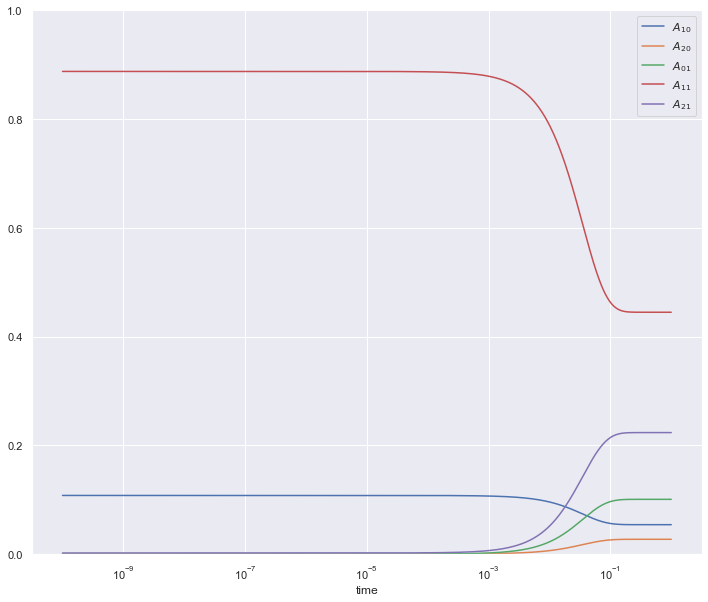

In [620]:
z = solve_ivp(two_cells, t_span2, ICS2, method='Radau', t_eval=t2, args=(phi, delta2, delta4, delta7, A_0, A10_0, A20_0, A01_0, 0, 0))

A10 = z.y[0]
A20 = z.y[1]
A01 = z.y[2]
A11 = z.y[3]
A21 = z.y[4]

fig, ax = plt.subplots(figsize=(12,10))

plt.plot(t, A10, label = r'$A_{10}$')
plt.plot(t, A20, label = r'$A_{20}$')
plt.plot(t, A01, label = r'$A_{01}$')
plt.plot(t, A11, label = r'$A_{11}$')
plt.plot(t, A21, label = r'$A_{21}$')
plt.xlabel('time')
plt.xscale('log')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.show()